In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# popular Python visualization librar

In [2]:
import warnings #Warnings are not the same as errors — they don’t stop your program, but they inform you that something may not work in the future or could be problematic.
warnings.filterwarnings("ignore")#The filterwarnings function controls whether warnings are shown or hidden.
#"ignore" is one of several options 
sns.set(style="whitegrid")#Set Seaborn plots to have a clean white background with a grid.

In [3]:
dataset=pd.read_csv(r"D:\dataset\fraudDetection\AIML Dataset.csv")

In [4]:
dataset.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
dataset.shape

(6362620, 11)

In [6]:
dataset.info() #a Pandas DataFrame method that gives you a quick summary of your dataset’s structure.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
dataset.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
dataset["isFraud"].value_counts() #gives total count

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
dataset["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [10]:
dataset.isnull().sum() #gives total number of null values as per columns

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
dataset.isnull().sum().sum() #total number of null value in the entire dataset

np.int64(0)

In [12]:
round((dataset["isFraud"].value_counts()[1]/dataset.shape[0])*100,2)
#dataset.shape[0] → total number of rows in the dataset (total transactions).
#Percentage (in decimal form) of fraud cases in the dataset.

np.float64(0.13)

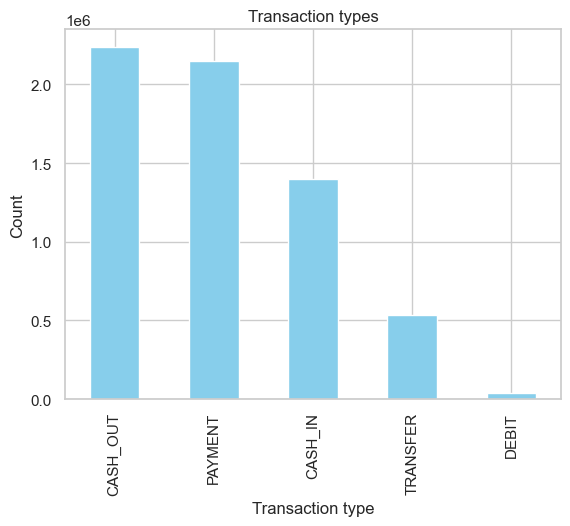

In [13]:
dataset["type"].value_counts().plot(kind="bar",title="Transaction types",color="skyblue")
plt.xlabel("Transaction type")
plt.ylabel("Count")
plt.show()


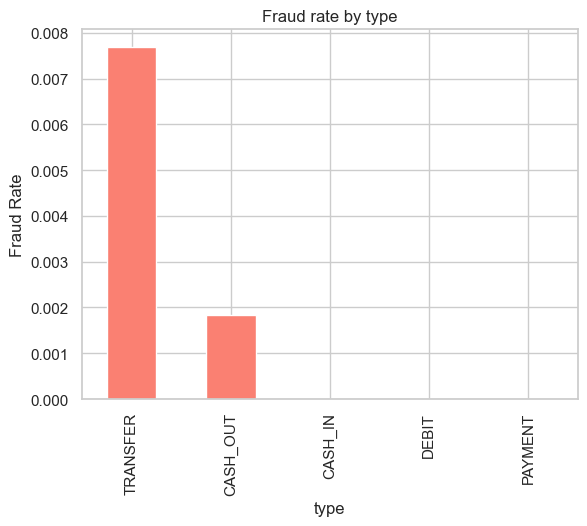

In [14]:
#finding the average fraud rate for each transaction type and sorting the results from highest to lowest
fraudByType=dataset.groupby("type")["isFraud"].mean().sort_values(ascending=False)
#Groups the dataset by the column type.After grouping, we focus only on the isFraud column in each group.Takes the mean of isFraud within each group
fraudByType.plot(kind="bar",title="Fraud rate by type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [15]:
dataset["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

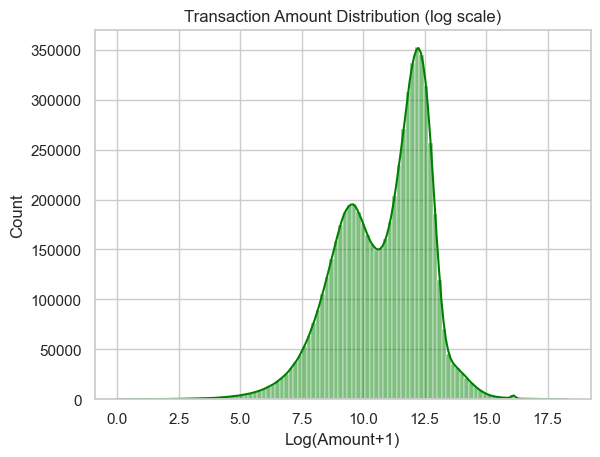

In [16]:
#This is Seaborn’s function to draw a histogram (frequency plot) of values.
sns.histplot(np.log1p(dataset["amount"]),bins=100,kde=True,color="green")
#np.log1p(dataset["amount"]) → the transformed transaction amounts.np.log1p(x) computes log(x + 1)
#bins=100 → split the range into 100 intervals.
#kde=True → add a smooth KDE (Kernel Density Estimate) curve on top, showing the probability density
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount+1)")
plt.show()

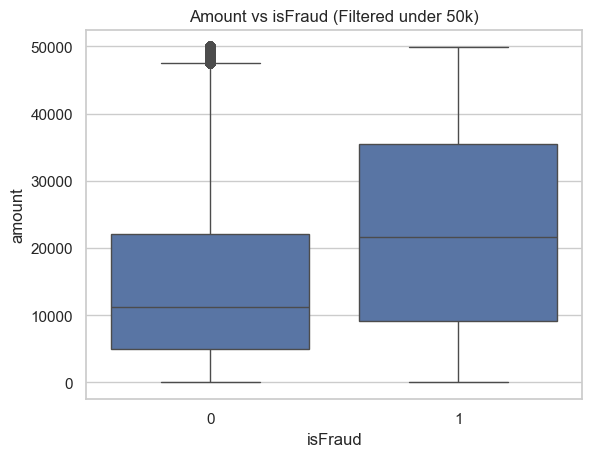

In [17]:
sns.boxplot(data=dataset[dataset["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [18]:
dataset["balanceDiffOrg"]=dataset["oldbalanceOrg"]-dataset["newbalanceOrig"]
dataset["balanceDiffDest"]=dataset["newbalanceDest"]-dataset["oldbalanceDest"]

In [19]:
(dataset["balanceDiffOrg"]<0).sum() #no of negative values

np.int64(1399253)

In [20]:
(dataset["balanceDiffDest"]<0).sum()

np.int64(1238864)

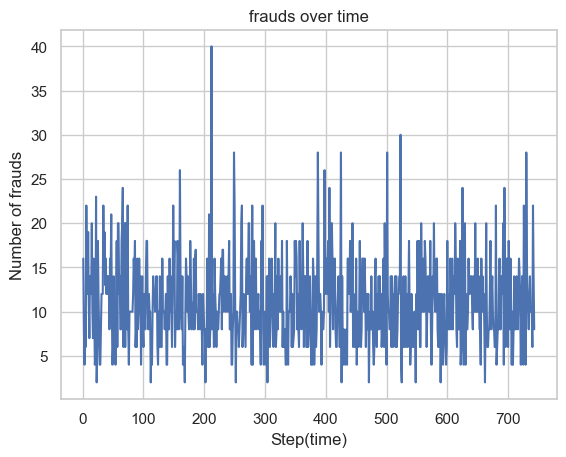

In [21]:
fraudsPerStep=dataset[dataset["isFraud"]==1]["step"].value_counts().sort_index()
#dataset[dataset["isFraud"]==1]
#Filters the DataFrame so only rows where isFraud == 1 (fraudulent transactions) remain.
#Non-fraud transactions (isFraud == 0) are excluded.
#["step"]
#From this filtered DataFrame, we take only the step column (time steps of fraud transactions).
#.value_counts()
#Counts how many frauds occurred at each step.
#.sort_index()
#value_counts() by default sorts by count (descending).
#But we want fraud counts in time order (step 1, 2, 3, …).
#sort_index() sorts the Series by its index (the step values), so the timeline is correct.
plt.plot(fraudsPerStep.index, fraudsPerStep.values, label="Frauds per step")
#fraudsPerStep.index
#The x-axis = time steps (1, 2, 3, …).
#fraudsPerStep.values
#The y-axis = number of frauds at each step.
#plt.plot(...)
#Draws a line plot of fraud counts over time.
#label="Frauds per step"
#Adds a label for the legend (so when you call plt.legend(), it shows up).
plt.xlabel("Step(time)")
plt.ylabel("Number of frauds")
plt.title("frauds over time")
plt.grid(True)
plt.show()

In [22]:
dataset.drop(columns="step",inplace=True)
#If you’re training a machine learning model, step may not be meaningful because fraud detection shouldn’t depend on the artificial simulation hour.

In [23]:
dataset.head(3)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0


In [24]:
topSenders=dataset["nameOrig"].value_counts().head(10)
#dataset["nameOrig"]
#Selects the column nameOrig from your dataset.
#Counts how many times each unique sender (nameOrig) appears in the dataset.
#By default, value_counts() sorts results in descending order, so .head(10) gives you the 10 most active senders.

In [25]:
topSenders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [26]:
topReceivers=dataset["nameDest"].value_counts().head(10)

In [27]:
topReceivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [28]:
fraudUsers=dataset[dataset["isFraud"]==1]["nameOrig"].value_counts().head(10)
#dataset[dataset["isFraud"]==1]
#Filters the dataset to only include rows where isFraud == 1.
#From those fraudulent transactions, select the nameOrig column.

In [29]:
fraudUsers

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [30]:
fraudTypes=dataset[dataset["type"].isin(["TRANSFER","CASH_OUT"])]

In [31]:
fraudTypes.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrg,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [32]:
fraudTypes["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

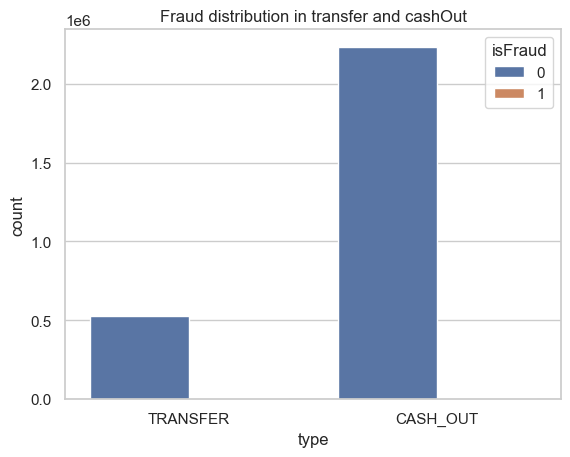

In [33]:
sns.countplot(data=fraudTypes,x="type",hue="isFraud")
plt.title("Fraud distribution in transfer and cashOut")
plt.show()

In [34]:
corr=dataset[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr() #for corelation

In [35]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


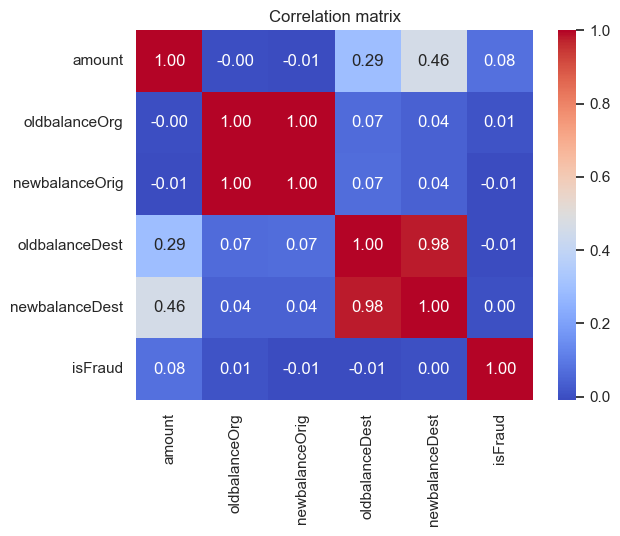

In [36]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.show()
#Each cell = correlation coefficient between two columns (values range from -1 to 1):
#1.0 → perfect positive correlation (when one increases, the other increases).
#-1.0 → perfect negative correlation (when one increases, the other decreases).
#0 → no correlation.

#Draws a heatmap (color-coded grid) of the correlation matrix.
#Rows and columns = dataset features.
#Color intensity = strength of correlation.

#annot=True
#Writes the actual correlation values inside each cell.

#cmap="coolwarm" Sets the color scheme:Blue = negative correlation|Red = positive correlation|White-ish = near 0 (no correlation)
#fmt=".2f"Controls the format of numbers inside the cells.
#".2f" = 2 decimal places 

In [37]:
zero_after_transfer=dataset[
(dataset["oldbalanceOrg"]>0) &
(dataset["newbalanceOrig"]==0) &
(dataset["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [38]:
len(zero_after_transfer)

1188074

In [39]:
dataset["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [41]:
dataset_model=dataset.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [42]:
dataset_model.head(3)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrg,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0


In [43]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [44]:
y=dataset_model["isFraud"]
x=dataset_model.drop("isFraud",axis=1)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)
#train_test_split
#This function comes from scikit-learn (from sklearn.model_selection import train_test_split).
#It splits your dataset into training and testing sets.
#Inputs: (x, y)
#x = features (independent variables, e.g., amount, type, balances).
#y = target (dependent variable, here isFraud).
#test_size=0.3 Means 30% of the data goes into the test set, and 70% into training.
#stratify=y
#Ensures that the class distribution of y (fraud vs non-fraud) is preserved in both training and test sets.

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)
#ColumnTransformer A scikit-learn tool that lets you apply different preprocessing to different columns.
#Example: scale numeric features, encode categorical features — all in one step.

In [47]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [48]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [49]:
y_pred=pipeline.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [51]:
confusion_matrix(y_test,y_pred)

array([[1802251,  104071],
       [    137,    2327]])

In [52]:
pipeline.score(x_test,y_test)*100

94.54061377231392

In [53]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']